# Exploring Contracts and Daily aggregates

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from mpltools import style
from mpltools import layout
import seaborn as sns
style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

Load the data

In [2]:
train = pd.read_csv("train.csv")
train_copy = train
test = pd.read_csv("test.csv")
daily = pd.read_csv("daily_aggregate.csv")
roaming = pd.read_csv("roaming_monthly.csv")
calendar = pd.read_csv("calendar_ref.csv")
contract = pd.read_csv("contract_ref.csv")

### Handsets

In [9]:
hoba = contract.merge(train)
hoba["COUNT"] = 1
hoba = hoba.groupby(by="HANDSET_NAME").sum()
hoba["Probability"] = hoba["TARGET"] *1.0 / hoba["COUNT"] 
c = hoba.sort(columns=["COUNT"],ascending=False)[["COUNT", "Probability"]]

### Rate Plans

In [4]:
hoba = contract.merge(train)
hoba["COUNT"] = 1
hoba = hoba.groupby(by="RATE_PLAN").sum()
hoba["Probability"] = hoba["TARGET"] *1.0 / hoba["COUNT"] 
c = hoba.sort(columns=["Probability"],ascending=False)[["COUNT", "Probability"]]
c

,COUNT,Probability
RATE_PLAN,,
Business Unified USB 3.5 GB,2,1.000000
New Bouquet Ctrl 200,1,1.000000
Business Unified USB 12 GB,1,1.000000
2011 Business Bouquet 500,1,1.000000
Business Bouquet 25 Control,1,1.000000
Business Ass. Engineering,7,0.857143
2011 Bouquet Ctrl 200,4,0.750000
Business USB 100,3,0.666667
New VF Data 250 business,3,0.666667


## Daily aggregate

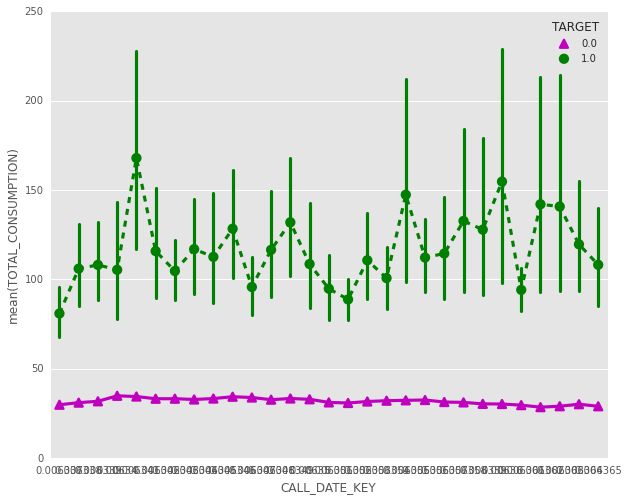

In [5]:
g = daily.merge(calendar, left_on="CALL_DATE_KEY", right_on="DATE_KEY")
g = g.merge(train, on="CONTRACT_KEY").groupby(["CONTRACT_KEY", "CALL_DATE_KEY"], as_index=False).sum()
g = g.groupby(["CALL_DATE_KEY", "TARGET"], as_index=False).agg(np.median).apply(lambda x: x / 1000000.0)
g["TARGET"][g["TARGET"] > 0] = 1
sns.pointplot(x="CALL_DATE_KEY", y="TOTAL_CONSUMPTION", hue="TARGET", data=g,
              palette={1: "g", 0: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

Only subset of the training + testing data has records in daily aggregate. Let's calcualte this percentage

In [8]:
len(set(daily["CONTRACT_KEY"])) * 1.0 / (len(train["CONTRACT_KEY"]) + len(test["CONTRACT_KEY"]))

0.2876753014116926